In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


%matplotlib inline

### 6

In [2]:
# Load dataset
wage = pd.read_csv('../../data/Wage.csv')
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
# Subset dataset
X = wage['age'].values.reshape(-1,1)
y = wage['wage']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=100)

In [18]:
# POLYNOMIAL REGRESSION

# initialize empty dict
scores = {}

# Cross val with polynomial with degree 1 through 5
for d in range(1,6):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lm = LinearRegression()
    lm_model = lm.fit(X_train_poly,y_train)
    lm_preds = lm_model.predict(X_valid_poly)
    score = mean_squared_error(y_valid,lm_preds)
    scores[d] = score
    
minval = min(scores.values())
mindegree = [k for k,v in scores.items() if v == minval]
    
print(scores)
print(f'Optimal polynomial degree: {mindegree}')

{1: 1729.4307871910755, 2: 1658.044351376369, 3: 1653.3265224812828, 4: 1658.2859333414, 5: 1658.6258357953827}
Optimal polynomial degree: [3]


/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 333.25527471319606)

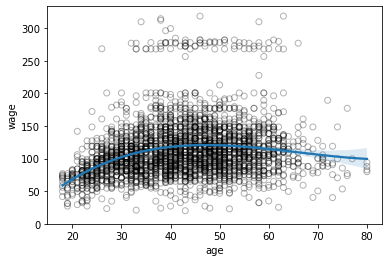

In [19]:
# Scatter plot with polynomial regression line for degree 3
fig, ax = plt.subplots(1,1)
ax.scatter(wage['age'], wage['wage'], facecolor = 'None', edgecolor = 'k', alpha=0.3)
sns.regplot(wage['age'], wage['wage'], order = mindegree[0], truncate=True, scatter=False, ax=ax)
ax.set_ylim(ymin=0)

In [5]:
# STEP FUNCTION
X_train_df = pd.DataFrame(X_train, columns = ['age'])
X_valid_df = pd.DataFrame(X_valid, columns = ['age'])

# initialize empty dictionary
scores = {}

for cut in range(1,7):
    
    # Generate cuts
    X_train_cut, bins = pd.cut(X_train_df['age'], cut, retbins = True, right = True)
    X_train_steps = pd.concat([X_train_df, X_train_cut], keys = ['age','age_cuts'], axis = 1)

    # Create dummy variables for the age groups
    X_train_steps_dummies = pd.get_dummies(X_train_steps['age_cuts'])
    
    # Put the test data in the same bins as the training data.
    X_valid_cut = pd.cut(X_valid_df['age'], bins)
    
    X_valid_steps = pd.concat([X_valid_df, X_valid_cut], keys = ['age','age_cuts'], axis = 1)

    # Create dummy variables for the age groups
    X_valid_steps_dummies = pd.get_dummies(X_valid_steps['age_cuts'])
    
    lm = LinearRegression()
    lm_model = lm.fit(X_train_steps_dummies,y_train)
    lm_preds = lm_model.predict(X_valid_steps_dummies)
    score = mean_squared_error(y_valid, lm_preds)
    scores[cut] = score

minval = min(scores.values())
mincut = [k for k,v in scores.items() if v == minval]
print(scores)
print(f'Optimal number of bins: {mincut}')

{1: 1782.3636113596724, 2: 1777.1292708349322, 3: 1712.3017446610527, 4: 1676.7229722281068, 5: 1700.407279563322, 6: 1690.466667906789}
Optimal number of bins: [4]


### 7

In [20]:
# Load dataset
wage = pd.read_csv('../../data/Wage.csv')
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [22]:
# Create X and y objects
X = wage['maritl'].values.reshape(-1,1)
y = wage['wage']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=100)

In [29]:
# Convert categorical data into dummies 
X_train_df = pd.DataFrame(X_train, columns = ['Married'])
X_train_dummies = pd.get_dummies(X_train_df)

X_valid_df = pd.DataFrame(X_valid, columns = ['Married'])
X_valid_dummies = pd.get_dummies(X_valid_df)

In [30]:
# Fit linear regression model
lm = LinearRegression()
lm_model = lm.fit(X_train_dummies,y_train)
lm_preds = lm_model.predict(X_valid_dummies)
score = mean_squared_error(y_valid,lm_preds)
print(score)

1678.9925947590073


### 8

In [36]:
# Load dataset
auto = pd.read_csv('../../data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [37]:
# Prepare X and y objects
X_full = auto.drop('mpg', axis=1)
y = auto['mpg']

numerical_cols = [col for col in X_full.columns if X_full[col].dtype in ['int64', 'float64']]
X = X_full[numerical_cols]

In [38]:
# Create train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=100)

# POLYNOMIAL REGRESSION

# initialize empty dict
scores = {}

# Cross val with polynomial with degree 1 through 5
for d in range(1,6):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lm = LinearRegression()
    lm_model = lm.fit(X_train_poly,y_train)
    lm_preds = lm_model.predict(X_valid_poly)
    score = mean_squared_error(y_valid,lm_preds)
    scores[d] = score
    
minval = min(scores.values())
mindegree = [k for k,v in scores.items() if v == minval]
    
print(scores)
print(f'Optimal polynomial degree: {mindegree}')

{1: 11.29486009973578, 2: 30.38451809723879, 3: 41.00913196428355, 4: 122915.39350575005, 5: 214692.12870915173}
Optimal polynomial degree: [1]


### 9